# 10.8 PROBABILITY OF ZERO COPIES

Use this notebook to store your work for this problem.

In [17]:
#*************************************************************
# Mario Segura
# Problem 10.8

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Random

from numpy.random import default_rng
rng = default_rng()
rand = rng.random

In [19]:
# Gillespie algorithm

l0 = 0
beta_birth = 1
k_death = 0.3

N = 150

l = l0
T = 0

for n in range(N):
    rate = beta_birth + k_death * l
    t = - 1/rate * np.log(rand())
    xi = beta_birth / rate
    event = rand() < xi
    
    Time = t.cumsum()

    Xi = 0.5

    Steps = 2*(rand(N) < Xi) - 1
    Location = Steps.cumsum()
    
    if event:
        l = l+1
    else:
        l = l-1
    T = T+t
    

In [20]:
def gillespie(l_init,T):
    t_s = np.zeros(T)
    l_s = np.zeros(T)
    beta_birth = 1
    k_death = 0.3
    N = T
    T0 = 0 
    l = l_init
    
    for n in range(N):
        rate = beta_birth + k_death*l
        t = - 1/rate * np.log(rand())
        xi = beta_birth/rate
        event = rand() < xi
        if event: 
            l = l+1
        else: 
            l = l-1
        T0 = T0+t
        t_s[n] = T0
        l_s[n] = l 
    
    return t_s, l_s

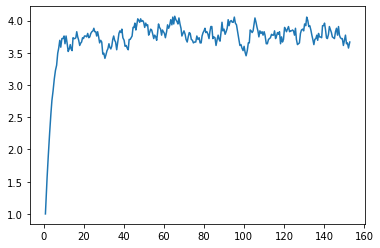

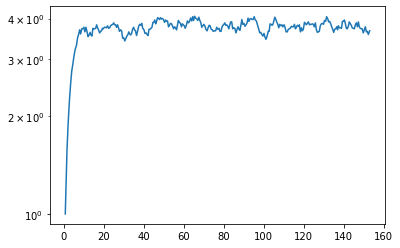

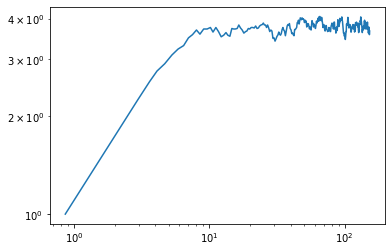

In [33]:
N_sim = 150
T = 300
l0 = 0 
l = np.empty((150,300))
time = np.empty((150,300))
for i in range(N_sim):
    res = gillespie(l0,T)
    l[i] = res[1]
    time[i] = res[0]
    
sum_l = np.zeros(T)
sum_t = np.zeros(T)

for n in range(T):
    sum_l[n] = l[0:,n].sum() 
    sum_t[n] = time[0:,n].sum()
ave_l = sum_l/N_sim
ave_t = sum_t/N_sim

plt.figure()
plt.plot(ave_t,ave_l)


plt.figure()
plt.semilogy(ave_t, ave_l)


plt.figure()
plt.loglog(ave_t, ave_l)


I attempted to change the code from 10.5 to tabulate the number to trials where the number of copies is still zero, and I was unsuccessful. Comparing the log plot to the similo plot in figure 10.6c, I see that there is not a common relationship once the semilog of the data is plotted. 